<a href="https://colab.research.google.com/github/Rachit180/FER/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax,Nadam
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Input, ZeroPadding2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import load_model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [ ]:
data = pd.read_csv('/content/fer2013.csv')
path='/content/fer2013.csv'

In [ ]:
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
# Split the pixel values into lists
train_pixels = data['pixels'].str.split(" ").tolist()

# Find the maximum length of lists
max_length = max(len(pixels) for pixels in train_pixels)

# Pad the lists with zeros to make them of equal length
train_pixels = [pixels + ['0'] * (max_length - len(pixels)) for pixels in train_pixels]

# Convert the list of lists to numpy array of uint8
train_pixels = np.uint8(train_pixels)


In [ ]:
import numpy as np

# Iterate over the dataset to extract pixel values
train_pixels = []
max_length = 0  # Initialize maximum length to 0
for index, row in data.iterrows():
    pixels = row['pixels'].split(" ")
    pixels = [int(pixel) for pixel in pixels]
    train_pixels.append(pixels)
    if len(pixels) > max_length:
        max_length = len(pixels)

# Pad the lists with zeros to make them of equal length
for pixels in train_pixels:
    pixels.extend([0] * (max_length - len(pixels)))

# Convert the list of lists to numpy array
train_pixels = np.uint8(train_pixels)


In [ ]:
def create(num):
  image = train_pixels[num]
  grid = image.reshape((48, 48))
  plt.imshow(grid, cmap='viridis')
  plt.title(data['emotion'][num])

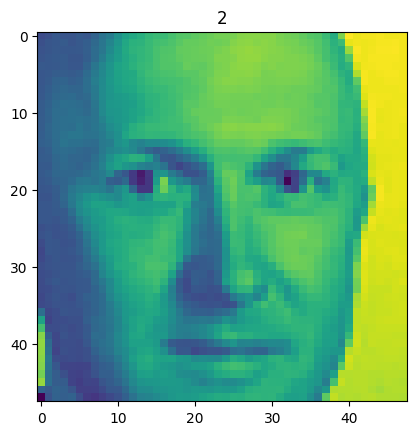

In [ ]:
create(33)

In [ ]:
x_data = data['pixels']
y_data = data['emotion']

y_data.value_counts()

emotion
3    1054
6     718
4     682
2     594
0     588
5     428
1      58
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

oversampler = RandomOverSampler(sampling_strategy='all')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(45724, 1)   (45724,)


In [ ]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
45719    0 0 0 1 0 76 119 131 145 153 160 169 178 188 1...
45720    204 202 206 196 76 48 38 59 52 32 27 29 17 19 ...
45721    247 247 247 247 247 248 248 248 249 245 183 16...
45722    24 21 32 68 62 40 32 32 31 36 56 84 106 118 12...
45723    16 14 11 9 9 9 8 5 8 21 18 21 18 10 14 16 12 9...
Length: 45724, dtype: object

In [ ]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255
print(x_data[:10])

[[0.27450982 0.3137255  0.32156864 ... 0.41568628 0.42745098 0.32156864]
 [0.5921569  0.5882353  0.5764706  ... 0.75686276 0.7176471  0.72156864]
 [0.90588236 0.83137256 0.6117647  ... 0.34509805 0.43137255 0.59607846]
 ...
 [0.3019608  0.30588236 0.30980393 ... 0.49019608 0.2627451  0.26666668]
 [0.33333334 0.32941177 0.3529412  ... 0.22745098 0.28627452 0.32941177]
 [1.         0.99607843 1.         ... 0.99607843 1.         1.        ]]


In [ ]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(45724, 48, 48, 1)

In [ ]:
y_data = np.array(y_data)
print(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape
print(y_data)

[0 0 2 ... 6 6 6]
[[0]
 [0]
 [2]
 ...
 [6]
 [6]
 [6]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D

model = Sequential()

# Input Layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(48, 48, 1), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(200, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(
    optimizer=Nadam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                   

In [ ]:
from tensorflow.keras import layers
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
#    # Conv2D then ReLU activation
#     x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    return x
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p
def upsample_block(x, conv_features, n_filters):
   # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
    x = layers.concatenate([x, conv_features])
   # dropout
    x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model():
    inputs = layers.Input(shape=(48,48,1))
   # encoder: contracting path - downsample
   # 1 - downsample
    f1, p1 = downsample_block(inputs, 8)
   # 2 - downsample
    f2, p2 = downsample_block(p1, 16)
   # 3 - downsample
    f3, p3 = downsample_block(p2, 32)
   # 4 - downsample

#     f4, p4 = downsample_block(p3, 64)

   # 5 - bottleneck
    bottleneck = double_conv_block(p3, 64)
   # decoder: expanding path - upsample
   # 6 - upsample
#     u6 = upsample_block(bottleneck, f4, 64)
   # 7 - upsample
    u7 = upsample_block(bottleneck, f3, 32)
   # 8 - upsample
    u8 = upsample_block(u7, f2, 16)
   # 9 - upsample
    u9 = upsample_block(u8, f1, 8)

   # outputs
    gap = layers.GlobalAveragePooling2D()(u9)

#     o = layers.Flatten()(u9)
#     o1 = layers.Dense(10, activation = "relu")(o)
    outputs = layers.Dense(7, activation = "softmax")(gap)
#     outouts=layers.Flatten()
   # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [ ]:
from tensorflow.keras import layers

def conv_block(x, n_filters, strides=(1, 1)):
    shortcut = x

    x = layers.Conv2D(n_filters, 3, strides=strides, padding='same', activation=None, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(n_filters, 3, strides=(1, 1), padding='same', activation=None, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if strides != (1, 1) or shortcut.shape[-1] != n_filters:
        shortcut = layers.Conv2D(n_filters, 1, strides=strides, padding='valid', activation=None, kernel_initializer='he_normal')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

def build_resnet_model():
    inputs = layers.Input(shape=(48, 48, 1))

    x = layers.Conv2D(64, 7, strides=(2, 2), padding='same', activation=None, kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Stage 1
    x = conv_block(x, 64, strides=(1, 1))
    x = conv_block(x, 64, strides=(1, 1))

    # Stage 2
    x = conv_block(x, 128, strides=(2, 2))
    x = conv_block(x, 128, strides=(1, 1))

    # Stage 3
    x = conv_block(x, 256, strides=(2, 2))
    x = conv_block(x, 256, strides=(1, 1))

    # Stage 4
    x = conv_block(x, 512, strides=(2, 2))
    x = conv_block(x, 512, strides=(1, 1))

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Output
    outputs = layers.Dense(7, activation='softmax')(x)

    # ResNet model with Keras Functional API
    resnet_model = tf.keras.Model(inputs, outputs, name='ResNet')

    return resnet_model


In [ ]:
resnet_model = build_resnet_model()
resnet_model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 24, 24, 64)           3200      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_20 (Ba  (None, 24, 24, 64)           256       ['conv2d_25[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 24, 24, 64)           0         ['batch_normalization_20[

In [ ]:
unet_model = build_unet_model()
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 48, 48, 8)            80        ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 8)            0         ['conv2d_45[0][0]']           
 g2D)                                                                                             
                                                                                                  
 dropout (Dropout)           (None, 24, 24, 8)            0         ['max_pooling2d_5[0][0]'] 

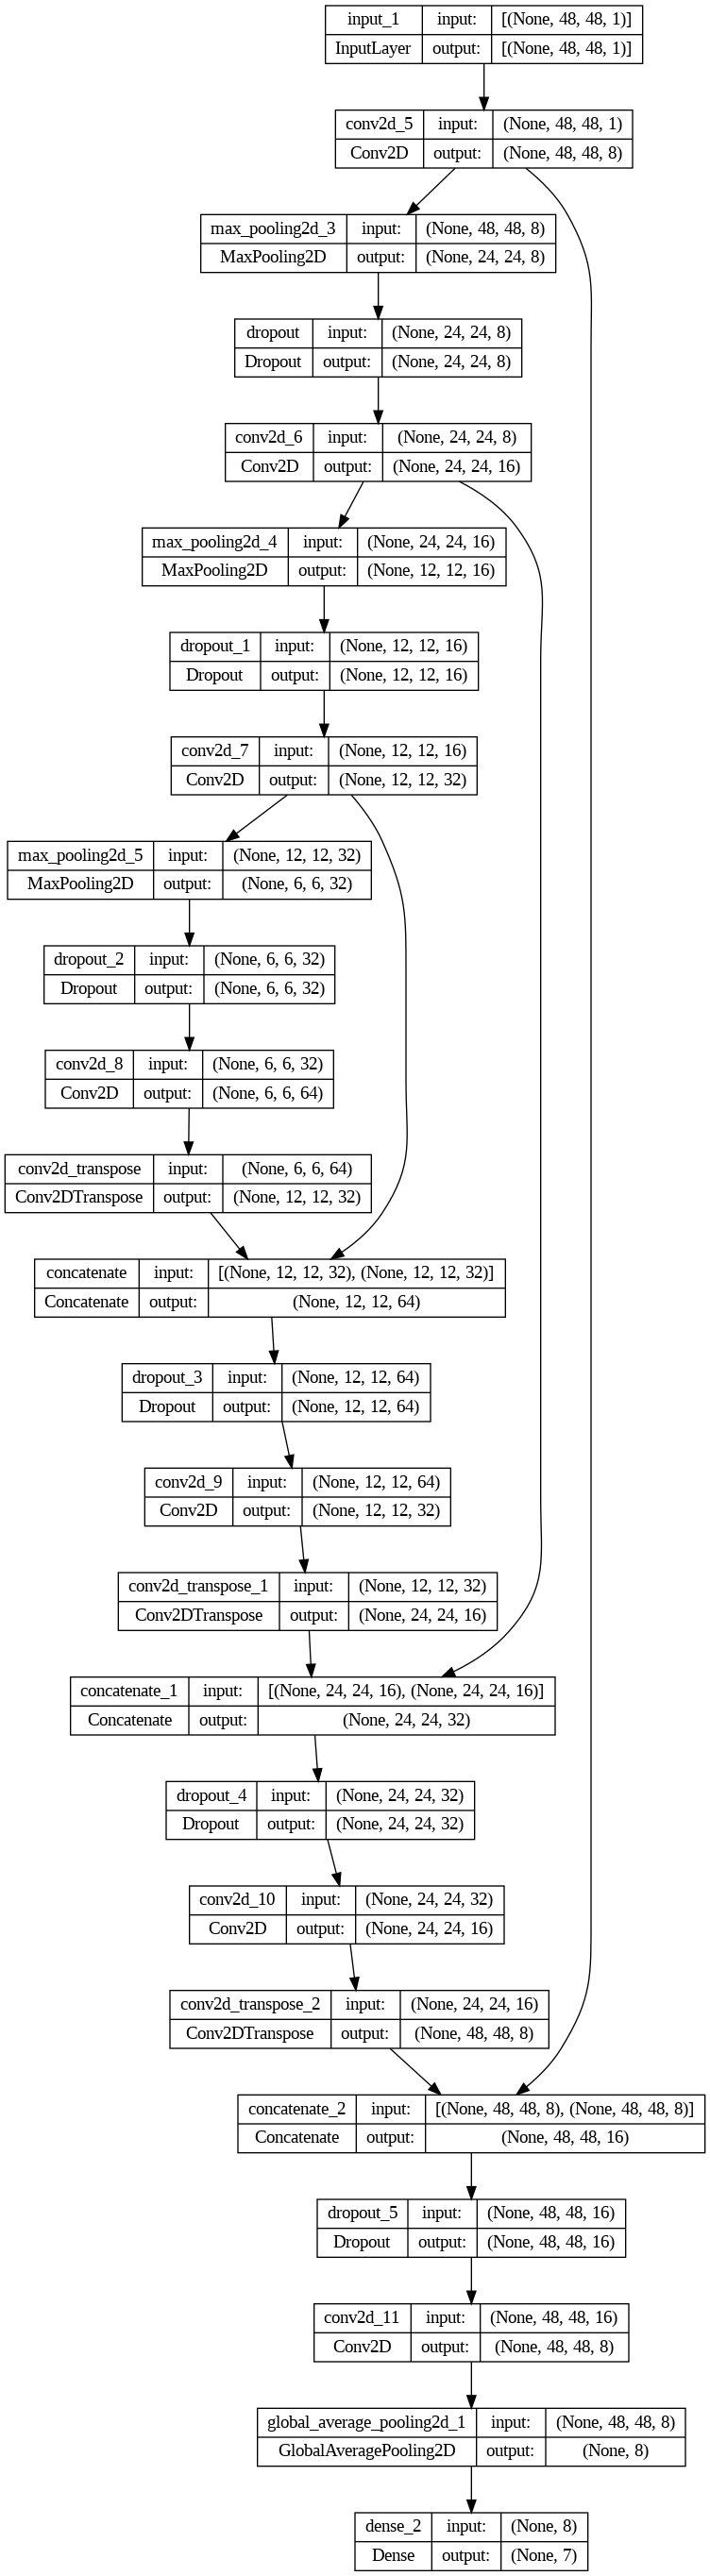

In [ ]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

In [ ]:
nag = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
unet_model.compile(optimizer=Nadam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(y_train.shape)
y_train = y_train.reshape((-1,1))
print(y_train.shape)
y_test = y_test.reshape((-1,1))

NameError: name 'y_train' is not defined

In [ ]:
print(y_train.shape)
y_train = to_categorical(y_train, 7)

print(y_train.shape)

(32921, 1)
(32921, 7)


In [ ]:
y_test = to_categorical(y_test, 7)
y_test.shape

(9145, 7)

In [ ]:
y_val = to_categorical(y_val, 7)
y_val.shape

(3658, 7)

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 10),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [ ]:
history = unet_model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=(X_val, y_val))

Epoch 1/60
708/708 [==============================] - ETA: 0s - loss: 1.9173 - accuracy: 0.1826
Epoch 1: val_accuracy improved from -inf to 0.20878, saving model to best_model.h5
708/708 [==============================] - 257s 356ms/step - loss: 1.9173 - accuracy: 0.1826 - val_loss: 1.8997 - val_accuracy: 0.2088
Epoch 2/60


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


708/708 [==============================] - ETA: 0s - loss: 1.8542 - accuracy: 0.2279
Epoch 2: val_accuracy improved from 0.20878 to 0.28963, saving model to best_model.h5
708/708 [==============================] - 258s 365ms/step - loss: 1.8542 - accuracy: 0.2279 - val_loss: 1.7698 - val_accuracy: 0.2896
Epoch 3/60
708/708 [==============================] - ETA: 0s - loss: 1.7597 - accuracy: 0.2900
Epoch 3: val_accuracy improved from 0.28963 to 0.34088, saving model to best_model.h5
708/708 [==============================] - 244s 345ms/step - loss: 1.7597 - accuracy: 0.2900 - val_loss: 1.6779 - val_accuracy: 0.3409
Epoch 4/60
708/708 [==============================] - ETA: 0s - loss: 1.6993 - accuracy: 0.3302
Epoch 4: val_accuracy improved from 0.34088 to 0.36770, saving model to best_model.h5
708/708 [==============================] - 250s 353ms/step - loss: 1.6993 - accuracy: 0.3302 - val_loss: 1.6388 - val_accuracy: 0.3677
Epoch 5/60
708/708 [==============================] - ETA: 0

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=(X_val, y_val))

Epoch 1/60
 27/515 [>.............................] - ETA: 4:24 - loss: 0.0901 - accuracy: 0.9664

KeyboardInterrupt: 

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

286/286 [==============================] - 26s 90ms/step - loss: 1.5819 - accuracy: 0.7734
Accuracy of our model on test data :  77.34280824661255 %


In [ ]:
model.save('fer_2013_74.60_resnet.keras')